# 1. NLP - от базы до DL (Гладышев ВВ)

1. Загрузите набор данных lenta-ru-news с помощью библиотеки Corus или любым другим способом для задачи классификации текстов по топикам (пригодятся атрибуты title, text, topic)

In [1]:
pip install corus gensim razdel navec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 4.4 MB/s eta 0:00:00


In [6]:
from corus import load_lenta
import pandas as pd
import numpy as np

In [9]:
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

--2025-07-31 09:22:10--  https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/87156914/0b363e00-0126-11e9-9e3c-e8c235463bd6?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-07-31T10%3A16%3A41Z&rscd=attachment%3B+filename%3Dlenta-ru-news.csv.gz&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-07-31T09%3A15%3A49Z&ske=2025-07-31T10%3A16%3A41Z&sks=b&skv=2018-11-09&sig=9dAPOQ6GpFasUXbw%2FCDjKjQ1zkuHhh0x8je6JpkIGcU%3D&jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1Mzk1NDAzMCwibmJmIjoxNzUzOTUzNzMwLCJwYXRoIjoicmVsZWFzZWFzc2V0

In [2]:
path = 'lenta-ru-news.csv.gz'

In [3]:
records = load_lenta(path)

In [4]:
records_list = []
for i, record in enumerate(records):
    if i < 2:
        records_list.append(record)
    else:
        break

print(records_list)

[LentaRecord(url='https://lenta.ru/news/2018/12/14/cancer/', title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака', text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.', topic='Россия', tags='Общество', date=None), LentaRecord(url='https://lenta.ru/news/2018/12/15/doping/', title='Австрия не\xa0представила доказательств вины российских биатлонистов', text='Австрий

In [5]:
records_list

[LentaRecord(
     url='https://lenta.ru/news/2018/12/14/cancer/',
     title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
     text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
     topic='Россия',
     tags='Общество',
     date=None
 ),
 LentaRecord(
     url='https://lenta.ru/news/2018/12/15/doping/',
     title='Австрия не\xa0представила доказательств

In [6]:
import itertools

records_list = list(itertools.islice(records, 2))
print(records_list)

[LentaRecord(url='https://lenta.ru/news/2018/12/15/usa25/', title='В США раскрыли сумму расходов на\xa0расследование «российского дела»', text='С начала расследования российского вмешательства в выборы власти США потратили более 25 миллионов долларов. Об этом сообщает Associated Press со ссылкой на отчет Министерства юстиции США. В документе содержатся данные о расходах на следствие с апреля по сентябрь 2018 года. За эти полгода было потрачено 4,6 миллиона долларов, из которых почти 3\xa0миллиона долларов ушли на зарплату сотрудников, 580 тысяч — на поездки и сопутствующие расходы. Ранее Минюст США уже публиковал отчеты о затратах на дело о российском вмешательстве за предыдущие месяцы. 11 декабря расследование спецпрокурора Робера Мюллера показало, что по меньшей мере 14 человек из окружения президента США Дональда Трампа контактировали с россиянами во время его избирательной кампании и последующего переходного периода перед вступлением в должность главы государства. Мюллер с 2017 год

In [7]:
# import polars as pl

# data = []
# for record in records_list:
#     data.append({
#         'title': record.title,
#         'text': record.text,
#         'topic': record.topic
#     })

# # Create a Polars DataFrame from the list of dictionaries
# polars_df = pl.DataFrame(data)

# # Display the Polars DataFrame
# print(polars_df)

In [8]:
data = []
for record in records:
    data.append({
        'title': record.title,
        'text': record.text,
        'topic': record.topic
    })

df = pd.DataFrame(data)
display(df)

,title,text,topic
0,Архиепископ канонической УПЦ отказался прийти ...,Архиепископ канонической Украинской православн...,Бывший СССР
1,Российскую молодежь предложили обучать духовны...,Российская молодежь лучше усвоит духовные ценн...,Интернет и СМИ
2,Полицейские из Солсбери описали одеревеневшего...,"Полицейские Алекс Коллинс и Трейси Холлоуэй, о...",Мир
3,Полет российских бомбардировщиков над Карибски...,Минобороны опубликовало на YouTube видео полет...,Мир
4,В Минобороны раскрыли многомиллионные хищения ...,Директора завода «Электроприбор» Муталиба Эмир...,Силовые структуры
...,...,...,...
739341,Южно-Сахалинск объявлен очагом холеры,Сегодня областной центр Сахалина и Курил получ...,Россия
739342,Леворадикалы создают предвыборный блок,Бывший шеф Службы безопасности президента Але...,Россия
739343,В горах Дагестана идут активные боевые действия,Сегодня утром в районах дагестанских селений Ч...,Россия
739344,Карачаево-Черкесия раскололась по национальном...,Намеченная на сегодняшний день церемония вступ...,Россия


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739346 entries, 0 to 739345
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   739346 non-null  object
 1   text    739346 non-null  object
 2   topic   739346 non-null  object
dtypes: object(3)
memory usage: 16.9+ MB


In [11]:
df.to_csv('lenta-ru-news.csv', sep=';', index=False)

In [12]:
import zipfile
import os

csv_file = 'lenta-ru-news.csv'
zip_file = 'lenta-ru-news.zip'

if os.path.exists(csv_file):
    with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
        zipf.write(csv_file, os.path.basename(csv_file))

    print(f"'{csv_file}' сжат в: '{zip_file}'")
else:
    print(f"Нет файла: {csv_file}")

'lenta-ru-news.csv' сжат в: 'lenta-ru-news.zip'


## Задание 1 (2 балла)

Подготовьте данные к обучению:
- Предобработайте данные: реализуйте оптимальную, на ваш взгляд, предобработку текстов
(нормализация, очистка, стемминг/лемматизация и т.п.) и таргета.
- hint: для ускорения обработки и обучения можно ограничиться не всем датасетом, а его репрезентативной частью, например, размера 100_000.
- Кратко опишите пайплайн, на котором остановились, и почему.
- Разделите датасет на обучающую, валидационную и тестовую выборки со стратификацией в пропорции 60/20/20. В качестве целевой переменной используйте атрибут topic

#### Описание пайплайна

Тексты новостей разделяются и лемматизируются с применением модуля ru_core_news_sm библиотеки Spacy. Именованные сущности NER обрабатываются отдельно для отдельной токенизации и должны служить дополнительными маркерами при классификации. NER также лемматизируются. NER  состоящие из нескольких слов лемматизируются и объединяются в один токен заменой разделителей на подчёркивания. Категориальные значения целевого признака преобразуются в числовые с помощью LabelEncoder из библиотеки Scikit-learn

In [13]:
# pip install spacy download

In [7]:
from sklearn.preprocessing import LabelEncoder
import re
import spacy

In [20]:
# dt = pd.read_csv('lenta-ru-news.csv', sep=';')

In [17]:
df['topic'].nunique()

24

In [18]:
df['topic'].unique()

array(['Бывший СССР', 'Интернет и СМИ', 'Мир', 'Силовые структуры',
       'Спорт', 'Россия', 'Экономика', 'Культура', 'Дом',
       'Наука и техника', 'Из жизни', 'Ценности', 'Путешествия', 'Бизнес',
       '69-я параллель', '', 'Культпросвет ', 'Крым', 'Оружие', 'Легпром',
       'МедНовости', 'Библиотека', 'ЧМ-2014', 'Сочи'], dtype=object)

In [21]:
label_encoder = LabelEncoder()
df['topic_encoded'] = label_encoder.fit_transform(df['topic'])

In [22]:
df

,title,text,topic,topic_encoded
0,Архиепископ канонической УПЦ отказался прийти ...,Архиепископ канонической Украинской православн...,Бывший СССР,4
1,Российскую молодежь предложили обучать духовны...,Российская молодежь лучше усвоит духовные ценн...,Интернет и СМИ,7
2,Полицейские из Солсбери описали одеревеневшего...,"Полицейские Алекс Коллинс и Трейси Холлоуэй, о...",Мир,13
3,Полет российских бомбардировщиков над Карибски...,Минобороны опубликовало на YouTube видео полет...,Мир,13
4,В Минобороны раскрыли многомиллионные хищения ...,Директора завода «Электроприбор» Муталиба Эмир...,Силовые структуры,18
...,...,...,...,...
739341,Южно-Сахалинск объявлен очагом холеры,Сегодня областной центр Сахалина и Курил получ...,Россия,17
739342,Леворадикалы создают предвыборный блок,Бывший шеф Службы безопасности президента Але...,Россия,17
739343,В горах Дагестана идут активные боевые действия,Сегодня утром в районах дагестанских селений Ч...,Россия,17
739344,Карачаево-Черкесия раскололась по национальном...,Намеченная на сегодняшний день церемония вступ...,Россия,17


In [24]:
nlp = spacy.load("ru_core_news_sm")

In [25]:
class NERLemmaTokenizer:
    def __init__(self):
        self.re_space = re.compile(r'\s+')

    def __call__(self, text):
        doc = nlp(text)
        in_ent = [False] * len(doc)

        # Помечаем токены, входящие в сущности
        for ent in doc.ents:
            for i in range(ent.start, ent.end):
                if i < len(in_ent):
                    in_ent[i] = True

        tokens = []
        i = 0
        while i < len(doc):
            if in_ent[i]:
                # Находим границы сущности
                j = i
                while j < len(doc) and in_ent[j]:
                    j += 1
                span = doc[i:j]

                # Лемматизация каждого слова в сущности
                lemmatized_ent = []
                for token in span:
                    # Пропускаем пунктуацию и пробелы
                    if not token.is_punct and not token.is_space:
                        lemmatized_ent.append(token.lemma_)

                # Объединяем леммы в один токен
                if lemmatized_ent:
                    ent_text = '_'.join(lemmatized_ent)
                    ent_text = ent_text.replace('-', '_')  # Замена дефисов
                    ent_text = ent_text.lower()            # Нижний регистр
                    tokens.append(ent_text)
                i = j
            else:
                # Обработка обычных слов
                token = doc[i]
                if not token.is_punct and not token.is_stop and not token.is_space:
                    tokens.append(token.lemma_.lower())
                i += 1
        return tokens

In [26]:
df["tokens"] = ""

In [27]:
df["title"] = df["title"].astype(str)
df["text"] = df["text"].astype(str)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739346 entries, 0 to 739345
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   title          739346 non-null  object
 1   text           739346 non-null  object
 2   topic          739346 non-null  object
 3   topic_encoded  739346 non-null  int32 
 4   tokens         739346 non-null  object
dtypes: int32(1), object(4)
memory usage: 25.4+ MB


In [29]:
tokenizer = NERLemmaTokenizer()

In [30]:
tok_ls = tokenizer(df["title"][0]) + tokenizer(df["text"][0])
print(tok_ls)

['архиепископ', 'канонический', 'упц', 'отказаться', 'прийти', 'сатанинский', 'сборище', 'киев', 'архиепископ', 'канонический', 'украинской_православный_церковь_московский_патриархат_упц_мп_лонгин', 'отказаться', 'участвовать', 'объединительный', 'собор', 'приглашение', 'вселенский', 'патриарх', 'варфоломей', 'назвать', 'мероприятие', 'собор', 'нечестивый', 'сатанинский', 'сборище', 'говориться', 'письмо', 'выдержка', 'публиковать', 'страна', 'священнослужитель', 'подчеркнуть', 'архиерей', 'упц_мп', 'против', 'собрание', 'называть', 'мать', 'церковь', 'отдать', 'поругание', 'православный', 'святыня', 'растерзание', 'истинный', 'православный_церковь', 'брат', 'сослужителей', 'допустить', 'мучение', 'пытание', 'священник', 'написать', 'лонгин', 'послание', 'осудить', 'снятие', 'анафема', 'предстоятель', 'неканонический', 'упц_киевский_патриархат_филарет', 'произойти', 'синод', 'стамбул', 'шокировать', 'православный', 'мир', 'отметить', 'архиепископ', 'объединительный', 'собор', 'иницииро

In [31]:
def combine_tokenized(row):
    return tokenizer(row['title']) + tokenizer(row['text'])

In [54]:
# df['tokens'] = df.apply(combine_tokenized, axis=1)

In [55]:
dt = df[:100000].copy()

In [56]:
dt["tokens"] = ""

In [8]:
import time

In [58]:
start = time.time()

dt['tokens'] = dt.apply(combine_tokenized, axis=1)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

Время выполнения: 4070.992 c.


In [86]:
df

,title,text,topic,topic_encoded,tokens
0,Архиепископ канонической УПЦ отказался прийти ...,Архиепископ канонической Украинской православн...,Бывший СССР,4,
1,Российскую молодежь предложили обучать духовны...,Российская молодежь лучше усвоит духовные ценн...,Интернет и СМИ,7,
2,Полицейские из Солсбери описали одеревеневшего...,"Полицейские Алекс Коллинс и Трейси Холлоуэй, о...",Мир,13,
3,Полет российских бомбардировщиков над Карибски...,Минобороны опубликовало на YouTube видео полет...,Мир,13,
4,В Минобороны раскрыли многомиллионные хищения ...,Директора завода «Электроприбор» Муталиба Эмир...,Силовые структуры,18,
...,...,...,...,...,...
739341,Южно-Сахалинск объявлен очагом холеры,Сегодня областной центр Сахалина и Курил получ...,Россия,17,
739342,Леворадикалы создают предвыборный блок,Бывший шеф Службы безопасности президента Але...,Россия,17,
739343,В горах Дагестана идут активные боевые действия,Сегодня утром в районах дагестанских селений Ч...,Россия,17,
739344,Карачаево-Черкесия раскололась по национальном...,Намеченная на сегодняшний день церемония вступ...,Россия,17,


In [87]:
start = time.time()

df['tokens'] = df.apply(combine_tokenized, axis=1)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

Время выполнения: 31198.926 c.


In [88]:
df['text_lemmatized'] = ""

In [89]:
df['text_lemmatized'] = df['tokens'].apply(lambda x: " ".join(x))

In [91]:
df.tail()

,title,text,topic,topic_encoded,tokens,text_lemmatized
739341,Южно-Сахалинск объявлен очагом холеры,Сегодня областной центр Сахалина и Курил получ...,Россия,17,"[южно_сахалинск, объявить, очаг, холера, сегод...",южно_сахалинск объявить очаг холера сегодня об...
739342,Леворадикалы создают предвыборный блок,Бывший шеф Службы безопасности президента Але...,Россия,17,"[леворадикалы, создавать, предвыборный, блок, ...",леворадикалы создавать предвыборный блок бывши...
739343,В горах Дагестана идут активные боевые действия,Сегодня утром в районах дагестанских селений Ч...,Россия,17,"[гора, дагестан, идти, активный, боевой, дейст...",гора дагестан идти активный боевой действие се...
739344,Карачаево-Черкесия раскололась по национальном...,Намеченная на сегодняшний день церемония вступ...,Россия,17,"[карачаево_черкесия, расколоться, национальный...",карачаево_черкесия расколоться национальный пр...
739345,Коржаков готов рассказать Генпрокуратуре про ф...,На состоявшейся сегодня в Москве пресс-конфере...,Россия,17,"[коржаков, готовый, рассказать, генпрокуратура...",коржаков готовый рассказать генпрокуратура фин...


In [92]:
df['topic_encoded'].value_counts()

topic_encoded
17    160518
13    136678
23     79538
20     64420
10     53803
4      53402
14     53136
7      44675
6      27611
5      21734
18     19596
21      7766
3       7399
16      6407
1       1268
8        666
9        340
0        203
11       114
2         65
15         3
22         2
12         1
19         1
Name: count, dtype: int64

In [93]:
dt = df.loc[(df['topic_encoded'] != 9) & 
    (df['topic_encoded'] != 0) & 
    (df['topic_encoded'] != 11) & 
    (df['topic_encoded'] != 2) & 
    (df['topic_encoded'] != 15) & 
    (df['topic_encoded'] != 22) & 
    (df['topic_encoded'] != 12) & 
    (df['topic_encoded'] != 19)]

In [69]:
from sklearn.model_selection import train_test_split

In [94]:
X_data, X_test, y_data, y_test = train_test_split(
    dt['text_lemmatized'],
    dt['topic_encoded'],
    test_size=0.2,
    random_state=42,
    stratify=dt['topic_encoded']
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_data,
    y_data,
    test_size=0.25,
    random_state=42,
    stratify=y_data
)

print("Размер обучающей выборки:", X_train.shape[0])
print("Размер валидационной выборки:", X_valid.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 443169
Размер валидационной выборки: 147724
Размер тестовой выборки: 147724


In [95]:
X_train.to_csv('X_train.csv', index=False, sep=';')
X_valid.to_csv('X_valid.csv', index=False, sep=';')
X_test.to_csv('X_test.csv', index=False, sep=';')
y_train.to_csv('y_train.csv', index=False, sep=';')
y_valid.to_csv('y_valid.csv', index=False, sep=';')
y_test.to_csv('y_test.csv', index=False, sep=';')
X_data.to_csv('X_data.csv', index=False, sep=';')
y_data.to_csv('y_data.csv', index=False, sep=';')

print("Данные сохранены в CSV файлы.")

Данные сохранены в CSV файлы.


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739346 entries, 0 to 739345
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   title            739346 non-null  object
 1   text             739346 non-null  object
 2   topic            739346 non-null  object
 3   topic_encoded    739346 non-null  int32 
 4   tokens           739346 non-null  object
 5   text_lemmatized  739346 non-null  object
dtypes: int32(1), object(5)
memory usage: 31.0+ MB


In [97]:
# df.to_csv('2025_08_01 lenta-ru-news.csv', sep=';', index=False)

In [61]:
dt = pd.read_csv('2025_08_01 lenta-ru-news.csv', sep=';')

In [62]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739346 entries, 0 to 739345
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   title            739346 non-null  object
 1   text             739341 non-null  object
 2   topic            739143 non-null  object
 3   topic_encoded    739346 non-null  int64 
 4   tokens           739346 non-null  object
 5   text_lemmatized  739346 non-null  object
dtypes: int64(1), object(5)
memory usage: 33.8+ MB


In [63]:
dt = dt.loc[(dt['topic_encoded'] != 9) & 
    (dt['topic_encoded'] != 0) & 
    (dt['topic_encoded'] != 11) & 
    (dt['topic_encoded'] != 2) & 
    (dt['topic_encoded'] != 15) & 
    (dt['topic_encoded'] != 22) & 
    (dt['topic_encoded'] != 12) & 
    (dt['topic_encoded'] != 19)]

In [70]:
X_data, X_test, y_data, y_test = train_test_split(
    dt['text_lemmatized'],
    dt['topic_encoded'],
    test_size=0.2,
    random_state=42,
    stratify=dt['topic_encoded']
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_data,
    y_data,
    test_size=0.25,
    random_state=42,
    stratify=y_data
)

print("Размер обучающей выборки:", X_train.shape[0])
print("Размер валидационной выборки:", X_valid.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 443169
Размер валидационной выборки: 147724
Размер тестовой выборки: 147724


In [ ]:
type(X_data), X_data.shape

## Задание 2 (2 балла)

Обучите модель sklearn.linear_model.LogisticRegression с двумя вариантами векторизации:
- sklearn.feature_extraction.text.CountVectorizer
- sklearn.feature_extraction.text.TfidfVectorizer

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfTransformer,  TfidfVectorizer
from sklearn.pipeline import Pipeline

In [98]:
vectorizer = CountVectorizer(max_df=0.7, min_df=0.003) # max_df фильтрует corpus-specific stop words
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [99]:
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_train_vectorized, y_train)
preds = dummy_clf.predict(X_test_vectorized)
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       254
           3       0.00      0.00      0.00      1480
           4       0.00      0.00      0.00     10680
           5       0.00      0.00      0.00      4347
           6       0.00      0.00      0.00      5522
           7       0.00      0.00      0.00      8935
           8       0.00      0.00      0.00       133
          10       0.00      0.00      0.00     10761
          13       0.00      0.00      0.00     27336
          14       0.00      0.00      0.00     10627
          16       0.00      0.00      0.00      1281
          17       0.22      1.00      0.36     32104
          18       0.00      0.00      0.00      3919
          20       0.00      0.00      0.00     12884
          21       0.00      0.00      0.00      1553
          23       0.00      0.00      0.00     15908

    accuracy                           0.22    147724
   macro avg       0.01   

#### На изначально сокращённой до 100к выборке

In [82]:
logreg = LogisticRegression(max_iter=1000).fit(X_train_vectorized, y_train)
preds = logreg.predict(X_test_vectorized)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.72      0.53      0.61       163
           3       0.55      0.53      0.54       399
           4       0.80      0.79      0.80      1362
           5       0.85      0.84      0.84       682
           6       0.73      0.75      0.74       981
           7       0.77      0.76      0.77      1387
           8       0.67      0.61      0.64       132
           9       0.51      0.33      0.40        61
          10       0.85      0.87      0.86      1316
          13       0.81      0.84      0.82      2884
          14       0.87      0.85      0.86      1129
          16       0.83      0.76      0.79       644
          17       0.74      0.77      0.76      3030
          18       0.72      0.72      0.72      1385
          20       0.96      0.95      0.95      2009
          21       0.89      0.90      0.89       896
          23       0.78      0.78      0.78      1537

    accuracy              

In [85]:
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(max_iter=1000))
    ]
).fit(X_train, y_train)
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.98      0.48      0.65       163
           3       0.70      0.39      0.50       399
           4       0.85      0.84      0.85      1362
           5       0.87      0.83      0.85       682
           6       0.80      0.77      0.79       981
           7       0.80      0.78      0.79      1387
           8       0.74      0.53      0.62       132
           9       0.69      0.15      0.24        61
          10       0.87      0.90      0.89      1316
          13       0.83      0.90      0.86      2884
          14       0.87      0.90      0.89      1129
          16       0.87      0.76      0.81       644
          17       0.77      0.83      0.79      3030
          18       0.78      0.72      0.75      1385
          20       0.95      0.96      0.96      2009
          21       0.92      0.90      0.91       896
          23       0.80      0.84      0.82      1537

    accuracy              

#### На полных даных

In [100]:
logreg = LogisticRegression(max_iter=1000).fit(X_train_vectorized, y_train)
preds = logreg.predict(X_test_vectorized)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.52      0.43      0.47       254
           3       0.57      0.52      0.54      1480
           4       0.82      0.79      0.80     10680
           5       0.84      0.83      0.83      4347
           6       0.63      0.61      0.62      5522
           7       0.76      0.71      0.73      8935
           8       0.66      0.46      0.54       133
          10       0.86      0.87      0.87     10761
          13       0.80      0.82      0.81     27336
          14       0.83      0.83      0.83     10627
          16       0.73      0.73      0.73      1281
          17       0.79      0.81      0.80     32104
          18       0.69      0.58      0.63      3919
          20       0.96      0.96      0.96     12884
          21       0.86      0.87      0.87      1553
          23       0.84      0.84      0.84     15908

    accuracy                           0.81    147724
   macro avg       0.76   

In [101]:
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(max_iter=1000))
    ]
).fit(X_train, y_train)
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.87      0.38      0.53       254
           3       0.75      0.46      0.57      1480
           4       0.85      0.86      0.86     10680
           5       0.87      0.84      0.85      4347
           6       0.71      0.65      0.68      5522
           7       0.80      0.76      0.78      8935
           8       0.67      0.31      0.42       133
          10       0.88      0.91      0.90     10761
          13       0.83      0.86      0.84     27336
          14       0.86      0.87      0.87     10627
          16       0.82      0.71      0.76      1281
          17       0.82      0.85      0.84     32104
          18       0.78      0.56      0.65      3919
          20       0.97      0.97      0.97     12884
          21       0.93      0.85      0.89      1553
          23       0.86      0.88      0.87     15908

    accuracy                           0.85    147724
   macro avg       0.83   

## Задание 3 (1 балл)

Попробуйте улучшить качество, подобрав оптимальные гиперпараметры трансформаций и модели на кросс-валидации

#### Добавим биграммы

In [10]:
len(X_train), len(y_train)

(443169, 443169)

In [11]:
X_train.shape, X_train[:300000].shape, y_train.shape, y_train[:300000].shape

((443169,), (300000,), (443169,), (300000,))

In [12]:
X_train.info()

<class 'pandas.core.series.Series'>
Index: 443169 entries, 216990 to 260964
Series name: text_lemmatized
Non-Null Count   Dtype 
--------------   ----- 
443169 non-null  object
dtypes: object(1)
memory usage: 6.8+ MB


In [13]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 443169 entries, 216990 to 260964
Series name: topic_encoded
Non-Null Count   Dtype
--------------   -----
443169 non-null  int64
dtypes: int64(1)
memory usage: 6.8 MB


In [13]:
start = time.time()

pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer(
            ngram_range=(1, 2),
            max_features=500000,
            dtype=np.float32)),
        ('clf', LogisticRegression(n_jobs=-1, max_iter=1000))
    ]
).fit(X_train, y_train)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

preds = pipe.predict(X_test)
print(classification_report(y_test, preds))

Время выполнения: 716.055 c.
              precision    recall  f1-score   support

           1       0.93      0.33      0.48       254
           3       0.78      0.47      0.58      1480
           4       0.86      0.86      0.86     10680
           5       0.88      0.84      0.86      4347
           6       0.72      0.65      0.68      5522
           7       0.81      0.77      0.79      8935
           8       0.82      0.27      0.41       133
          10       0.89      0.91      0.90     10761
          13       0.83      0.87      0.85     27336
          14       0.87      0.88      0.87     10627
          16       0.84      0.69      0.76      1281
          17       0.82      0.86      0.84     32104
          18       0.82      0.59      0.68      3919
          20       0.97      0.97      0.97     12884
          21       0.94      0.85      0.89      1553
          23       0.86      0.88      0.87     15908

    accuracy                           0.85    1477

#### RandomForestClassifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
start = time.time()

pipe_fr = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('rfc', RandomForestClassifier(n_jobs=-1, verbose=1, random_state=42))
    ]
).fit(X_train, y_train)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 25.8min finished


Время выполнения: 1574.972 c.


In [108]:
preds = pipe_fr.predict(X_test)
print(classification_report(y_test, preds))

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.6s


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       254
           3       0.92      0.03      0.06      1480
           4       0.86      0.53      0.65     10680
           5       0.92      0.64      0.75      4347
           6       0.83      0.24      0.38      5522
           7       0.81      0.50      0.62      8935
           8       1.00      0.02      0.03       133
          10       0.83      0.86      0.84     10761
          13       0.70      0.85      0.77     27336
          14       0.81      0.83      0.82     10627
          16       0.96      0.23      0.38      1281
          17       0.65      0.86      0.74     32104
          18       0.91      0.07      0.14      3919
          20       0.94      0.97      0.95     12884
          21       0.97      0.69      0.80      1553
          23       0.75      0.86      0.80     15908

    accuracy                           0.75    147724
   macro avg       0.80   

[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    3.2s finished
C:\Users\AIshared\.conda\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\AIshared\.conda\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\AIshared\.conda\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

#### XGBoost Classifier

In [10]:
# pip install xgboost

In [9]:
import xgboost as xgb

In [10]:
y_train.nunique()

16

In [11]:
num_classes = len(np.unique(y_train))
num_classes

16

In [17]:
params = {
    'objective': 'multi:softmax',
    'num_class': num_classes,
    'tree_method': 'hist',
    'device': 'cuda',
    'random_state': 42,
    'n_jobs': -1,
    # 'max_depth': 6,
    # 'learning_rate': 0.1,
    # 'n_estimators': 500,
}

In [18]:
from sklearn.preprocessing import LabelEncoder

# Создаем и применяем кодировщик меток
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [19]:
len(le.classes_)

16

In [20]:
start = time.time()

pipe_xgbc = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer(
            # ngram_range=(1, 2),
            # max_features=120000,
            dtype=np.float32)),
        ('xgbc', xgb.XGBClassifier(**params))
    ]
).fit(X_train, y_train_encoded)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

Время выполнения: 115.625 c.


In [21]:
preds_encoded = pipe_xgbc.predict(X_test)
preds_original = le.inverse_transform(preds_encoded)

print(classification_report(y_test, preds_original))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       254
           3       0.06      0.00      0.00      1480
           4       0.17      0.28      0.21     10680
           5       0.07      0.02      0.04      4347
           6       0.07      0.21      0.10      5522
           7       0.16      0.18      0.17      8935
           8       0.00      0.00      0.00       133
          10       0.16      0.66      0.25     10761
          13       0.34      0.19      0.24     27336
          14       0.37      0.12      0.18     10627
          16       0.03      0.02      0.02      1281
          17       0.45      0.06      0.11     32104
          18       0.00      0.00      0.00      3919
          20       0.41      0.54      0.46     12884
          21       0.00      0.00      0.00      1553
          23       0.37      0.35      0.36     15908

    accuracy                           0.23    147724
   macro avg       0.16   

C:\Users\AIshared\.conda\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\AIshared\.conda\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\AIshared\.conda\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### CatBoostClassifier

In [25]:
# pip install catboost

In [11]:
from catboost import CatBoostClassifier

In [12]:
from catboost.utils import get_gpu_device_count

gpu_count = get_gpu_device_count()
print(f"Доступно GPU устройств: {gpu_count}")

if gpu_count == 0:
    raise RuntimeError("Не найдены GPU устройства! Измените task_type='CPU'")

Доступно GPU устройств: 2


In [ ]:
start = time.time()

pipe_cbc = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer(
            # ngram_range=(1, 2),
            # max_features=120000,
            dtype=np.float32)),
        ('cbc', CatBoostClassifier(
            random_state=42,
            task_type='GPU',
            devices='0, 1',
            silent=False))
    ]
).fit(X_train, y_train)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

In [ ]:
preds = pipe_cbc.predict(X_test)
print(classification_report(y_test, preds))

#### LGBMClassifier

In [18]:
# pip install lightgbm

In [15]:
clf = LGBMClassifier()
print(clf.get_params())  # Проверить доступные параметры GPU

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [13]:
from lightgbm import LGBMClassifier

In [16]:
num_classes = len(np.unique(y_train))
num_classes

16

In [19]:
start = time.time()

pipe_lgc = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer(
            # ngram_range=(1, 2),
            # max_features=120000,
            dtype=np.float32)),
        ('lgc', LGBMClassifier(
            random_state=42,
            device='gpu',
            gpu_platform_id=0,  # ID платформы OpenCL (обычно 0)
            gpu_device_id=0,    # ID устройства GPU (обычно 0)
            objective='multiclass',
            num_class=num_classes
        ))
    ]
).fit(X_train, y_train)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2261255
[LightGBM] [Info] Number of data points in the train set: 443169, number of used features: 58917
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3090 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (1.69 MB) transferred to GPU in 0.004218 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -6.367073
[LightGBM] [Info] Start training from score -4.603522
[LightGBM] [Info] Start training from score -2.626935
[LightGBM] [Info] Start training from score -3.525930
[LightGBM] [Info] Start training from score -3.286538
[LightGBM] [Info] Start training from score -2.805363
[LightGBM] [Info] Start training from score -7.010242
[LightGBM] [Info] Start t

In [20]:
preds = pipe_lgc.predict(X_test)
print(classification_report(y_test, preds))

C:\Users\AIshared\.conda\envs\nlp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.03      0.01      0.01       254
           3       0.48      0.37      0.42      1480
           4       0.75      0.78      0.77     10680
           5       0.76      0.74      0.75      4347
           6       0.59      0.43      0.50      5522
           7       0.69      0.67      0.68      8935
           8       0.00      0.02      0.01       133
          10       0.80      0.82      0.81     10761
          13       0.75      0.78      0.76     27336
          14       0.79      0.77      0.78     10627
          16       0.55      0.56      0.56      1281
          17       0.74      0.76      0.75     32104
          18       0.65      0.48      0.55      3919
          20       0.91      0.93      0.92     12884
          21       0.72      0.75      0.74      1553
          23       0.78      0.79      0.79     15908

    accuracy                           0.75    147724
   macro avg       0.63   

#### Cross-validation

In [30]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import KFold

In [24]:
RANDOM_STATE = 42

In [25]:
kf3 = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

In [28]:
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer(
            # ngram_range=(1, 2),
            # max_features=120000,
            dtype=np.float32)),
        ('clf', LogisticRegression())
    ]
)

In [29]:
parameter_grid = {
    "tfidf__norm": ("l1", "l2"),
    "clf__C": np.linspace(0.1, 1, 10),
}

In [32]:
grid_search = HalvingGridSearchCV(
    pipe,
    param_grid=parameter_grid,
    n_jobs=-1,
    verbose=1,
    cv=kf3,
    scoring='accuracy',
    random_state=RANDOM_STATE,
)

In [33]:
start = time.time()

grid_search.fit(X_data, y_data)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 65654
max_resources_: 590893
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 65654
Fitting 3 folds for each of 20 candidates, totalling 60 fits
----------
iter: 1
n_candidates: 7
n_resources: 196962
Fitting 3 folds for each of 7 candidates, totalling 21 fits
----------
iter: 2
n_candidates: 3
n_resources: 590886
Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\AIshared\.conda\envs\nlp\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AIshared\.conda\envs\nlp\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AIshared\.conda\envs\nlp\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\AIshared\.conda\envs\nlp\Lib\site-packages\sklearn\pipeline.py", line 663, in 

Время выполнения: 3105.445 c.


In [34]:
preds = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.75      0.36      0.49       254
           3       0.66      0.48      0.56      1480
           4       0.85      0.85      0.85     10680
           5       0.86      0.83      0.85      4347
           6       0.70      0.65      0.67      5522
           7       0.79      0.76      0.77      8935
           8       0.45      0.32      0.38       133
          10       0.88      0.91      0.89     10761
          13       0.82      0.85      0.84     27336
          14       0.86      0.86      0.86     10627
          16       0.80      0.70      0.74      1281
          17       0.82      0.84      0.83     32104
          18       0.75      0.57      0.65      3919
          20       0.97      0.96      0.97     12884
          21       0.89      0.86      0.88      1553
          23       0.86      0.87      0.87     15908

    accuracy                           0.84    147724
   macro avg       0.79   

In [35]:
grid_search.best_score_

np.float64(0.8349066800251901)

In [36]:
results = pd.DataFrame(grid_search.cv_results_)
results

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_tfidf__norm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0,65654,107.379051,0.654041,7.138929,0.778348,0.1,l1,"{'clf__C': 0.1, 'tfidf__norm': 'l1'}",0.226193,0.227792,0.239627,0.231204,0.005992,29,0.226782,0.229615,0.229660,0.228685,0.001346
1,0,65654,215.966253,6.555466,10.310716,1.355107,0.1,l2,"{'clf__C': 0.1, 'tfidf__norm': 'l2'}",0.714814,0.711844,0.719567,0.715409,0.003181,19,0.732756,0.730974,0.733030,0.732253,0.000912
2,0,65654,161.742222,4.326293,10.854933,0.830675,0.2,l1,"{'clf__C': 0.2, 'tfidf__norm': 'l1'}",0.294005,0.291583,0.307074,0.297554,0.006804,28,0.287875,0.287624,0.292376,0.289292,0.002183
3,0,65654,255.486306,16.208519,9.278330,1.630791,0.2,l2,"{'clf__C': 0.2, 'tfidf__norm': 'l2'}",0.752376,0.746207,0.753610,0.750731,0.003238,18,0.779661,0.779524,0.778336,0.779174,0.000595
4,0,65654,195.503597,11.071662,11.592757,1.240272,0.3,l1,"{'clf__C': 0.30000000000000004, 'tfidf__norm':...",0.364833,0.364970,0.379273,0.369692,0.006775,27,0.355434,0.357468,0.362814,0.358572,0.003112
5,0,65654,292.577639,40.799048,10.376908,2.025979,0.3,l2,"{'clf__C': 0.30000000000000004, 'tfidf__norm':...",0.768095,0.760784,0.768827,0.765902,0.003631,17,0.804314,0.802166,0.802646,0.803042,0.000920
6,0,65654,265.230922,0.495514,7.167079,0.519209,0.4,l1,"{'clf__C': 0.4, 'tfidf__norm': 'l1'}",0.412402,0.410483,0.423232,0.415372,0.005613,26,0.404510,0.403185,0.406612,0.404769,0.001411
7,0,65654,316.065635,26.405136,6.013411,1.146118,0.4,l2,"{'clf__C': 0.4, 'tfidf__norm': 'l2'}",0.777280,0.769421,0.778240,0.774980,0.003951,16,0.820946,0.818844,0.821403,0.820398,0.001114
8,0,65654,239.132284,38.876640,11.161921,5.159382,0.5,l1,"{'clf__C': 0.5, 'tfidf__norm': 'l1'}",0.444069,0.440596,0.452020,0.445561,0.004782,25,0.437753,0.432772,0.436679,0.435735,0.002140
9,0,65654,337.494476,6.238761,4.940854,0.690087,0.5,l2,"{'clf__C': 0.5, 'tfidf__norm': 'l2'}",0.784135,0.775133,0.784866,0.781378,0.004426,15,0.835706,0.833124,0.835386,0.834738,0.001149


In [31]:
plt.rcParams["figure.figsize"] = (12, 8)

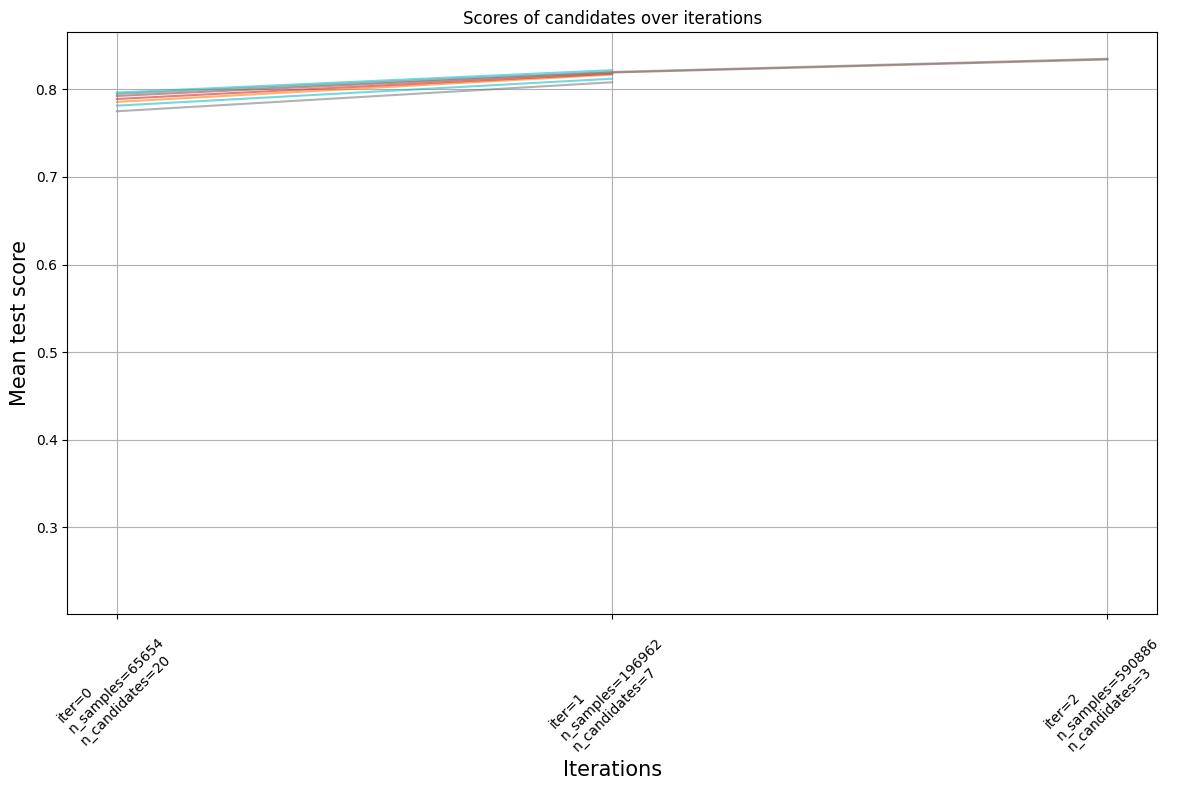

In [37]:
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter",
    columns="params_str",
     values="mean_test_score",
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={grid_search.n_resources_[i]}\nn_candidates={grid_search.n_candidates_[i]}"
    for i in range(grid_search.n_iterations_)
]

ax.set_xticks(range(grid_search.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("Mean test score", fontsize=15)
ax.set_xlabel("Iterations", fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

In [45]:
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer(
            # ngram_range=(1, 2),
            # max_features=120000,
            dtype=np.float32)),
        ('clf', LogisticRegression(
            max_iter=1000,
            solver='saga',
            random_state=RANDOM_STATE))
    ]
)

In [46]:
parameter_grid = {
    # "tfidf__norm": ("l1", "l2"),
    "clf__C": np.linspace(0.1, 1, 10),
}

In [47]:
grid_search = HalvingGridSearchCV(
    pipe,
    param_grid=parameter_grid,
    n_jobs=-1,
    verbose=1,
    cv=kf3,
    scoring='accuracy',
    random_state=RANDOM_STATE,
)

In [48]:
start = time.time()

grid_search.fit(X_data, y_data)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 65654
max_resources_: 590893
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10
n_resources: 65654
Fitting 3 folds for each of 10 candidates, totalling 30 fits
----------
iter: 1
n_candidates: 4
n_resources: 196962
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 2
n_candidates: 2
n_resources: 590886
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Время выполнения: 441.612 c.


In [49]:
preds = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.88      0.47      0.61       254
           3       0.76      0.49      0.59      1480
           4       0.86      0.87      0.86     10680
           5       0.87      0.85      0.86      4347
           6       0.71      0.66      0.69      5522
           7       0.80      0.77      0.79      8935
           8       0.73      0.33      0.46       133
          10       0.89      0.91      0.90     10761
          13       0.83      0.86      0.85     27336
          14       0.86      0.88      0.87     10627
          16       0.83      0.72      0.77      1281
          17       0.83      0.86      0.84     32104
          18       0.79      0.58      0.67      3919
          20       0.97      0.97      0.97     12884
          21       0.93      0.86      0.89      1553
          23       0.87      0.88      0.87     15908

    accuracy                           0.85    147724
   macro avg       0.84   

In [50]:
grid_search.best_score_

np.float64(0.8432907292977365)

In [51]:
results = pd.DataFrame(grid_search.cv_results_)
results

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0,65654,10.871715,0.492882,1.787057,0.049852,0.1,{'clf__C': 0.1},0.714860,0.711661,0.719750,0.715424,0.003326,16,0.732482,0.731317,0.732916,0.732238,0.000675
1,0,65654,11.108374,0.253589,1.825252,0.029152,0.2,{'clf__C': 0.2},0.751782,0.745430,0.753244,0.750152,0.003392,15,0.779045,0.778176,0.778953,0.778725,0.000390
2,0,65654,11.291351,0.076213,2.000857,0.047616,0.3,{'clf__C': 0.30000000000000004},0.768370,0.761104,0.769558,0.766344,0.003737,14,0.804976,0.802486,0.803857,0.803773,0.001018
3,0,65654,11.763397,0.178396,1.964859,0.094139,0.4,{'clf__C': 0.4},0.777509,0.769649,0.777783,0.774980,0.003771,13,0.821609,0.820010,0.821038,0.820885,0.000662
4,0,65654,11.992026,0.162216,2.043834,0.040266,0.5,{'clf__C': 0.5},0.783403,0.775315,0.784683,0.781134,0.004147,12,0.835249,0.833307,0.835157,0.834571,0.000895
5,0,65654,12.612169,0.232157,2.071025,0.040038,0.6,{'clf__C': 0.6},0.788019,0.780068,0.788933,0.785673,0.003981,11,0.846330,0.845027,0.846261,0.845873,0.000598
6,0,65654,12.676602,0.199936,1.994831,0.083540,0.7,{'clf__C': 0.7000000000000001},0.790532,0.783769,0.792771,0.789024,0.003827,10,0.856108,0.854669,0.855948,0.855575,0.000644
7,0,65654,12.511829,0.048050,1.868923,0.095276,0.8,{'clf__C': 0.8},0.792725,0.786099,0.795787,0.791537,0.004043,9,0.864585,0.862825,0.864288,0.863899,0.000769
8,0,65654,11.412494,0.394324,1.593242,0.083987,0.9,{'clf__C': 0.9},0.794325,0.788978,0.798209,0.793837,0.003784,8,0.871324,0.870273,0.871462,0.871020,0.000531
9,0,65654,9.613453,0.441284,1.330995,0.091506,1.0,{'clf__C': 1.0},0.795878,0.790578,0.800037,0.795497,0.003871,7,0.878019,0.877128,0.879207,0.878118,0.000852


## Задание 4 (2 балла)

Обучите word2vec-эмбеддинги с помощью библиотеки gensim:
- создайте модель для обучения на ваших данных, опишите, какими значениями вы инициализировали гиперпараметры модели, и почему
- визуально оцените внутреннее (intrinsic) качество получившихся эмбеддингов, используя методы gensim — doesnt_match, most_similar

In [53]:
pip install --upgrade gensim numpy

  Using cached numpy-2.3.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.50.3 requires regex!=2019.12.17, which is not installed.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
import gensim.models

In [2]:
from corus import load_lenta
import spacy
import string

In [ ]:
from ast import literal_eval

In [31]:
from gensim.models import Word2Vec

In [9]:
data = pd.read_csv('2025_08_01 lenta-ru-news.csv', sep=';')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739346 entries, 0 to 739345
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   title            739346 non-null  object
 1   text             739341 non-null  object
 2   topic            739143 non-null  object
 3   topic_encoded    739346 non-null  int64 
 4   tokens           739346 non-null  object
 5   text_lemmatized  739346 non-null  object
dtypes: int64(1), object(5)
memory usage: 33.8+ MB


In [24]:
data["text_lemmatized"][1].split()[:10]

['российский',
 'молодёжь',
 'предложить',
 'обучать',
 'духовный',
 'ценность',
 'соцсетях',
 'российский',
 'молодёжь',
 'лучше']

In [25]:
corpus = data["text_lemmatized"].apply(str.split).tolist()

In [26]:
corpus = [doc for doc in corpus if doc] # проверка на пустые документы

In [28]:
corpus[1][:10]

['российский',
 'молодёжь',
 'предложить',
 'обучать',
 'духовный',
 'ценность',
 'соцсетях',
 'российский',
 'молодёжь',
 'лучше']

In [36]:
type(corpus), type(corpus[0]), type(corpus[0][0])

(list, list, str)

In [39]:
model = Word2Vec(
    vector_size=300,
    window=10,
    min_count=15,
    sg=1,
    negative=15,
    workers=20,
    batch_words=100000,
    seed=2025,
    sample=1e-5,
    ns_exponent=0.75,
    alpha=0.025,
    min_alpha=0.0001,
    compute_loss=True
)

In [40]:
start = time.time()

model.build_vocab(
    corpus_iterable=corpus,
    trim_rule=None,  # Автоматически применяет min_count
    progress_per=10000  # Вывод прогресса каждые 10k слов
)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

Время выполнения: 13.009 c.


In [43]:
start = time.time()

model.train(
    corpus_iterable=corpus,
    total_examples=model.corpus_count,  # Автоматический подсчет
    total_words=model.corpus_total_words,  # Автоматический подсчет
    epochs=35,
    start_alpha=model.alpha,
    end_alpha=model.min_alpha,
    compute_loss=True,
    report_delay=60  # Вывод прогресса раз в минуту
)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

Время выполнения: 1243.884 c.


In [44]:
model.init_sims(replace=True)  # 1. Предварительно вычисляет L2-нормы
                               # 2. Заменяет векторы их нормализованными версиями

C:\Users\AIshared\AppData\Local\Temp\ipykernel_6600\1851704068.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)  # 1. Предварительно вычисляет L2-нормы


In [45]:
word_vector = model.wv['россия']
word_vector

array([ 5.65768331e-02, -5.25675416e-02, -3.26988567e-03, -7.95225352e-02,
        6.90453826e-03, -1.42279360e-02,  2.51895785e-02, -8.65642950e-02,
       -7.00012967e-02,  4.41431850e-02,  2.63763182e-02, -2.05511358e-02,
        2.27968637e-02, -3.68061736e-02, -1.11585580e-01,  4.81823757e-02,
        5.36781065e-02, -5.74680082e-02,  3.63852009e-02, -2.99327038e-02,
        5.12846112e-02,  4.16006241e-03,  7.30188638e-02,  2.55089477e-02,
       -1.00308634e-01, -4.46851999e-02,  2.78533120e-02, -2.81086680e-03,
       -1.28673688e-02, -4.23305761e-03, -2.74012852e-02,  3.47956158e-02,
       -4.19441890e-03, -1.27234861e-01, -4.94103460e-03,  2.19223369e-02,
       -1.01988643e-01,  2.11817250e-02, -1.46022648e-01,  8.50630552e-02,
        5.93824014e-02,  8.76531899e-02, -4.36980873e-02,  2.28773337e-02,
       -4.19617854e-02, -1.62512511e-02,  1.20102838e-02, -6.28714934e-02,
        3.80109437e-02,  2.76367646e-02, -3.08561232e-02, -3.13215405e-02,
       -3.02542467e-02, -

In [46]:
similarity = model.wv.similarity('путин', 'медведев')
similarity

0.6730341

### Оценка

In [56]:
test_cases = {
    "doesnt_match": [
        ["яблоко", "груша", "банан", "помидор"],
        ["москва", "санкт_петербург", "новосибирск", "минск"],
        ["путин", "медведев", "обама", "шойгу"],
        ["футбол", "хоккей", "теннис", "шахматы"]
    ],
    "most_similar": [
        "россия",
        "путин",
        "компьютер",
        "любовь",
        "экономика"
    ]
}

#### Поиск лишнего слова

In [51]:
for i, words in enumerate(test_cases["doesnt_match"]):
    try:
        # Фильтруем слова, присутствующие в модели
        valid_words = [w for w in words if w in model.wv]
        if len(valid_words) < 2:
            continue
            
        odd_one = model.wv.doesnt_match(valid_words)
        print(f"\nТест {i+1}:")
        print(f"Слова: {', '.join(valid_words)}")
        print(f"Лишнее: {odd_one}")
        print(f"Обоснование: {', '.join(valid_words)} → {odd_one} отличается по семантике")
        
    except Exception as e:
        print(f"\nОшибка в тесте {i+1}: {str(e)}")


Тест 1:
Слова: яблоко, груша, банан, помидор
Лишнее: банан
Обоснование: яблоко, груша, банан, помидор → банан отличается по семантике

Тест 2:
Слова: москва, санкт_петербург, новосибирск, минск
Лишнее: минск
Обоснование: москва, санкт_петербург, новосибирск, минск → минск отличается по семантике

Тест 3:
Слова: путин, медведев, обама, шойгу
Лишнее: шойгу
Обоснование: путин, медведев, обама, шойгу → шойгу отличается по семантике

Тест 4:
Слова: футбол, хоккей, теннис, шахматы
Лишнее: шахматы
Обоснование: футбол, хоккей, теннис, шахматы → шахматы отличается по семантике


#### Поиск похожих слов

In [52]:
for i, word in enumerate(test_cases["most_similar"]):
    try:
        if word not in model.wv:
            print(f"\nСлово '{word}' отсутствует в словаре")
            continue
            
        similar = model.wv.most_similar(word, topn=10)
        print(f"\nТест {i+1}: Слово '{word}'")
        print("Топ-10 похожих:")
        for j, (sim_word, score) in enumerate(similar):
            print(f"{j+1}. {sim_word} ({score:.3f})")
        
    except Exception as e:
        print(f"\nОшибка в тесте {i+1}: {str(e)}")


Тест 1: Слово 'россия'
Топ-10 похожих:
1. российский (0.826)
2. отметить (0.652)
3. страна (0.650)
4. касаться (0.619)
5. подчеркнуть (0.615)
6. украина (0.604)
7. белоруссия (0.603)
8. европа (0.598)
9. международный (0.588)
10. август (0.585)

Тест 2: Слово 'путин'
Топ-10 похожих:
1. владимир_путин (0.897)
2. россия_владимир_путин (0.864)
3. дмитрий_медведев (0.707)
4. рф_владимир_путин (0.704)
5. кремль (0.688)
6. медведев (0.673)
7. президент (0.654)
8. государство (0.646)
9. дмитрий_песков (0.638)
10. россия_дмитрий_медведев (0.613)

Тест 3: Слово 'компьютер'
Топ-10 похожих:
1. компьютерный (0.721)
2. ноутбук (0.655)
3. персональный (0.634)
4. windows (0.631)
5. ультрабюджетные (0.615)
6. неттоп (0.613)
7. пк (0.607)
8. boot_camp (0.606)
9. пользователь (0.604)
10. файл (0.600)

Тест 4: Слово 'любовь'
Топ-10 похожих:
1. любить (0.652)
2. лариса_удовиченко (0.546)
3. фильм (0.541)
4. рассказывать (0.540)
5. роман (0.534)
6. тигран_кеосаяна (0.527)
7. режиссёр (0.525)
8. raising (0

## Задание 5 (1 балл)

Загрузите предобученные эмбеддинги из navec или rusvectores (на ваш вкус)

In [59]:
from navec import Navec

In [60]:
path = 'navec_news_v1_1B_250K_300d_100q.tar'
navec = Navec.load(path)
navec['человек'][:15]

array([-0.13068067, -0.12051002, -0.05782367,  0.07967507,  0.08338855,
        0.59920526,  0.4020081 , -1.0838276 ,  0.12556174,  0.17060532,
        0.16637331, -0.00257014,  0.51296437,  0.17175263, -0.40394753],
      dtype=float32)

## Задание 6 (1 балл)

Обучите модель sklearn.linear_model.LogisticRegression с обученными и загруженными эмбеддингами, сравните их качество между собой на валидационной выборке
- ваши эмбеддинги w2v
- предобученные эмбеддинги navec/rusvectores


In [66]:
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm

In [73]:
# Функция для векторизации текста (усреднение векторов слов)
def text_to_vector(text, embeddings, vector_size=300):
    words = text.split()
    vectors = []
    for word in words:
        if word in embeddings:  # Для Word2Vec: embeddings=w2v_model.wv
            vectors.append(embeddings[word])
        # Для отсутствующих слов ничего не добавляем
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    return np.zeros(vector_size)

In [76]:
def vectorize_corpus(df, embeddings, vector_size=300):
    print("Генерация векторов")
    vectors = np.array([text_to_vector(text, embeddings, vector_size) 
                       for text in tqdm(df)])
    return vectors

In [80]:
[text for text in tqdm(X_train[:3])]

100%|██████████| 3/3 [00:00<?, ?it/s]


['google запустить приложение мониторинг здоровье google_fit компания google выпустить приложение google fit помощь пользователь следить здоровье физический активность сообщаться официальный блог google приложение google_fit впервые анонсировано конференция google_i_o июнь сегодняшний день пользователь скачать бесплатно магазин google_play устройство платформа android 4.0 ice cream sandwich поздний версия помощь сенсор встроить android смартфон носимые устройство сервис автоматически фиксировать пользователь ходить бегать ехать велосипед пользователь установить иные фитнес цели отслеживать достижение слово разработчик проверять google_fit android смартфон носимых устройство android wear компьютер веб браузер планшет пользователь подключить платформа сторонний фитнес устройства приложение strava runtastic runkeeper интегрироваться google_fit контроль фитнес активность помощь технология тренд рынок приложение health интегрировать различный фитнес сервисов часть операционный система ios 8

In [81]:
start = time.time()

X_train_w2v = vectorize_corpus(X_train, model.wv)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

Генерация векторов


100%|██████████| 443169/443169 [01:10<00:00, 6273.13it/s]


Время выполнения: 70.905 c.


In [83]:
start = time.time()

X_val_w2v = vectorize_corpus(X_valid, model.wv)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

Генерация векторов


100%|██████████| 147724/147724 [00:22<00:00, 6636.97it/s]


Время выполнения: 22.386 c.


In [84]:
start = time.time()

X_train_navec = vectorize_corpus(X_train, navec)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

Генерация векторов


100%|██████████| 443169/443169 [03:16<00:00, 2251.11it/s]


Время выполнения: 197.310 c.


In [87]:
start = time.time()

X_val_navec = vectorize_corpus(X_valid, navec)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

Генерация векторов


100%|██████████| 147724/147724 [01:12<00:00, 2036.70it/s]


Время выполнения: 72.632 c.


In [94]:
def train_evaluate_model(X_train, X_val, y_train, y_val, name):
    print(f"\nОбучение LogisticRegression для {name}...")
    model = LogisticRegression(
        max_iter=1000,
        random_state=2025,
        n_jobs=-1,
        verbose=1
    )
    
    model.fit(X_train, y_train)
    
    # Прогноз и оценка
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    print(f"Результаты {name}:")
    print(f"  Accuracy = {acc:.4f}")
    print(f"  F1-score = {f1:.4f}")
    print("-"*50)
    
    return acc, f1

In [95]:
results = {}

In [96]:
start = time.time()

results['w2v'] = train_evaluate_model(X_train_w2v, X_val_w2v, y_train, y_valid, "Word2Vec")

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")


Обучение LogisticRegression для Word2Vec...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


Результаты Word2Vec:
  Accuracy = 0.7966
  F1-score = 0.7875
--------------------------------------------------
Время выполнения: 205.629 c.


In [97]:
start = time.time()

results['navec'] = train_evaluate_model(X_train_navec, X_val_navec, y_train, y_valid, "Navec")

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")


Обучение LogisticRegression для Navec...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


Результаты Navec:
  Accuracy = 0.7800
  F1-score = 0.7740
--------------------------------------------------
Время выполнения: 203.188 c.


In [99]:
print("\nСравнение результатов:")
print(f"Word2Vec Accuracy: {results['w2v'][0]:.4f} vs Navec: {results['navec'][0]:.4f}")
print(f"Word2Vec F1-score: {results['w2v'][1]:.4f} vs Navec: {results['navec'][1]:.4f}")


Сравнение результатов:
Word2Vec Accuracy: 0.7966 vs Navec: 0.7800
Word2Vec F1-score: 0.7875 vs Navec: 0.7740


## Задание 7 (1 балл)

Финально сравните качество всех моделей на тестовой выборке

In [100]:
start = time.time()

X_test_w2v = vectorize_corpus(X_test, model.wv)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

Генерация векторов


100%|██████████| 147724/147724 [00:23<00:00, 6214.75it/s]


Время выполнения: 23.869 c.


In [101]:
start = time.time()

X_test_navec = vectorize_corpus(X_test, navec)

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")

Генерация векторов


100%|██████████| 147724/147724 [01:10<00:00, 2086.42it/s]


Время выполнения: 70.908 c.


In [102]:
results = {}

In [103]:
start = time.time()

results['w2v'] = train_evaluate_model(X_train_w2v, X_test_w2v, y_train, y_test, "Word2Vec")

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")


Обучение LogisticRegression для Word2Vec...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


Результаты Word2Vec:
  Accuracy = 0.7977
  F1-score = 0.7888
--------------------------------------------------
Время выполнения: 204.934 c.


In [104]:
start = time.time()

results['navec'] = train_evaluate_model(X_train_navec, X_test_navec, y_train, y_test, "Navec")

end = time.time()
print(f"Время выполнения: {(end - start):.3f} c.")


Обучение LogisticRegression для Navec...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


Результаты Navec:
  Accuracy = 0.7810
  F1-score = 0.7752
--------------------------------------------------
Время выполнения: 203.404 c.


In [105]:
print("\nСравнение результатов:")
print(f"Word2Vec Accuracy: {results['w2v'][0]:.4f} vs Navec: {results['navec'][0]:.4f}")
print(f"Word2Vec F1-score: {results['w2v'][1]:.4f} vs Navec: {results['navec'][1]:.4f}")


Сравнение результатов:
Word2Vec Accuracy: 0.7977 vs Navec: 0.7810
Word2Vec F1-score: 0.7888 vs Navec: 0.7752
